In [1]:
!nvidia-smi

Sat Nov 22 10:32:37 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   66C    P8             12W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
!pip install ultralytics roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 36.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 20.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 80.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 110.4 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.12.0.88
    Uninstalling opencv-python-headless-4.12.0.88:
      Successfully uninstalled opencv-python-headless-4.12.0.88
  Attempting uninstall: idna
    Found existing installation: idna 3.11
    Uninstalling idna-3.11:
      Successfully uninstalled idna-3.11


In [3]:
from roboflow import Roboflow

rf = Roboflow(api_key="WYxeLuU4ev3hFq3Oacrb")
project = rf.workspace("capstone-project-n2hsm").project("move-dataset-ihl1b")
version = project.version(2)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to move-dataset-2 in yolov8:: 100%|██████████| 15820/15820 [00:03<00:00, 4908.21it/s] 


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [4]:
# Download the YOLOv8 Architecture File
!wget https://raw.githubusercontent.com/ultralytics/ultralytics/main/ultralytics/cfg/models/v8/yolov8.yaml

--2025-11-22 10:33:14--  https://raw.githubusercontent.com/ultralytics/ultralytics/main/ultralytics/cfg/models/v8/yolov8.yaml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1977 (1.9K) [text/plain]
Saving to: ‘yolov8.yaml’

yolov8.yaml         100%[===================>]   1.93K  --.-KB/s    in 0s      

2025-11-22 10:33:14 (39.2 MB/s) - ‘yolov8.yaml’ saved [1977/1977]



In [5]:
# Create YOLOv8l Architecture
!cp yolov8.yaml yolov8l.yaml

In [6]:
# Copy YOLOv8l Small Architecture
!cp yolov8.yaml yolov8l-small.yaml

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="WYxeLuU4ev3hFq3Oacrb")
project = rf.workspace("capstone-project-n2hsm").project("move-dataset-ihl1b")
version = project.version(2)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...


In [ ]:
## the small object.yaml
# YOLOv8 small-object optimized model
# nc: 80

# scales:
#   s: [0.33, 0.50, 1024]

# backbone:
#   # stem
#   - [-1, 1, Conv, [64, 3, 2]]     # P1/2
#   - [-1, 1, Conv, [128, 3, 2]]    # P2/4
#   - [-1, 3, C2f, [128, True]]

#   - [-1, 1, Conv, [256, 3, 2]]    # P3/8
#   - [-1, 6, C2f, [256, True]]

#   - [-1, 1, Conv, [512, 3, 2]]    # P4/16
#   - [-1, 6, C2f, [512, True]]

#   # remove P5 → no Conv to 1024, no SPPF

# head:
#   # Upsample P4 → merge with P3
#   - [-1, 1, nn.Upsample, [None, 2, "nearest"]]
#   - [[-1, 4], 1, Concat, [1]]        # P3 fusion
#   - [-1, 3, C2f, [256]]              # P3 head

#   # Detect small objects (80×80)
#   - [[-1], 1, Detect, [nc]]          # Detect P3

#   # Downsample → P4 detect branch
#   - [-3, 1, Conv, [512, 3, 2]]       # Back to P4
#   - [[-1, 6], 1, Concat, [1]]        # merge with original P4
#   - [-1, 3, C2f, [512]]              # P4 head

#   # Detect medium objects (40×40)
#   - [[-1], 1, Detect, [nc]]          # Detect P4


In [8]:
!yolo detect train \
    model=/content/yolov8_small_objects.yaml \
    data=/content/move-dataset-2/data.yaml \
    workers=2 \
    batch=12 \
    device=0 \
    epochs=50 \
    patience=10 \
    imgsz=640 \
    name=yolov8_small_objects_train

WARNING ⚠️ no model scale passed. Assuming scale='s'.
Ultralytics 8.3.230 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=12, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/move-dataset-2/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=/content/yolov8_small_objects.yaml, momentum=0.937, mosaic=1.0, multi_scale=False, name=yolov8_small_objects_train, nbs=64, nms=False, opset=None,

In [9]:
from ultralytics import YOLO

model = YOLO("/content/runs/detect/yolov8_small_objects_train/weights/best.pt")

results = model.val(
    data="/content/move-dataset-2/data.yaml",
    split="test",          # pakai test set
    imgsz=640,
    save_json=True,        # COCO-style eval
    save_hybrid=True       # simpan prediksi detail
)

print(results)


WARNING ⚠️ 'save_hybrid' is deprecated and will be removed in the future.
Ultralytics 8.3.230 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8_small_objects summary (fused): 47 layers, 4,739,364 parameters, 0 gradients, 25.5 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1383.5±632.6 MB/s, size: 57.5 KB)
val: Scanning /content/move-dataset-2/test/labels... 307 images, 1 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 307/307 2.4Kit/s 0.1s
val: New cache created: /content/move-dataset-2/test/labels.cache
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 20/20 4.0it/s 5.0s
                   all        307       1068      0.677      0.824      0.794      0.346
                  fire        305        772      0.657      0.699      0.669      0.242
                 smoke        295        296      0.697      0.949       0.92      0.451
Speed: 1.8ms preprocess, 7.9ms inference, 0.0ms loss, 1.0ms postprocess 

In [10]:
model.val(
    data="/content/move-dataset-2/data.yaml",
    split="test",
    imgsz=640,
    plots=True   # wajib untuk generate PNG
)


Ultralytics 8.3.230 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1696.5±294.8 MB/s, size: 58.5 KB)
val: Scanning /content/move-dataset-2/test/labels.cache... 307 images, 1 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 307/307 674.5Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 20/20 3.3it/s 6.1s
                   all        307       1068      0.677      0.824      0.794      0.346
                  fire        305        772      0.657      0.699      0.669      0.242
                 smoke        295        296      0.697      0.949       0.92      0.451
Speed: 3.5ms preprocess, 8.0ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to /content/runs/detect/val2


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7ff4602d2c90>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804

In [11]:
import shutil
from google.colab import files

zip_path = "/content/yolo_eval_results.zip"
eval_folder = "/content/runs/detect/val/"

shutil.make_archive(zip_path.replace(".zip", ""), 'zip', eval_folder)

files.download(zip_path)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [12]:
from google.colab import files

best_weight = "/content/runs/detect/yolov8_small_objects_train/weights/best.pt"
files.download(best_weight)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [22]:
from google.colab import files

uploaded = files.upload()   # upload gambar (jpg/png)


Saving testing3.jpg to testing3.jpg
Saving testing2.jpg to testing2.jpg


In [25]:
from ultralytics import YOLO

model = YOLO("/content/runs/detect/yolov8_small_objects_train/weights/best.pt")

results = model.predict(
    source="testing3.jpg",   # ganti dengan nama file kamu
    conf=0.25,
    save=True
)



image 1/1 /content/testing3.jpg: 384x640 1 fire, 5 smokes, 29.3ms
Speed: 1.4ms preprocess, 29.3ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)
Results saved to /content/runs/detect/predict3


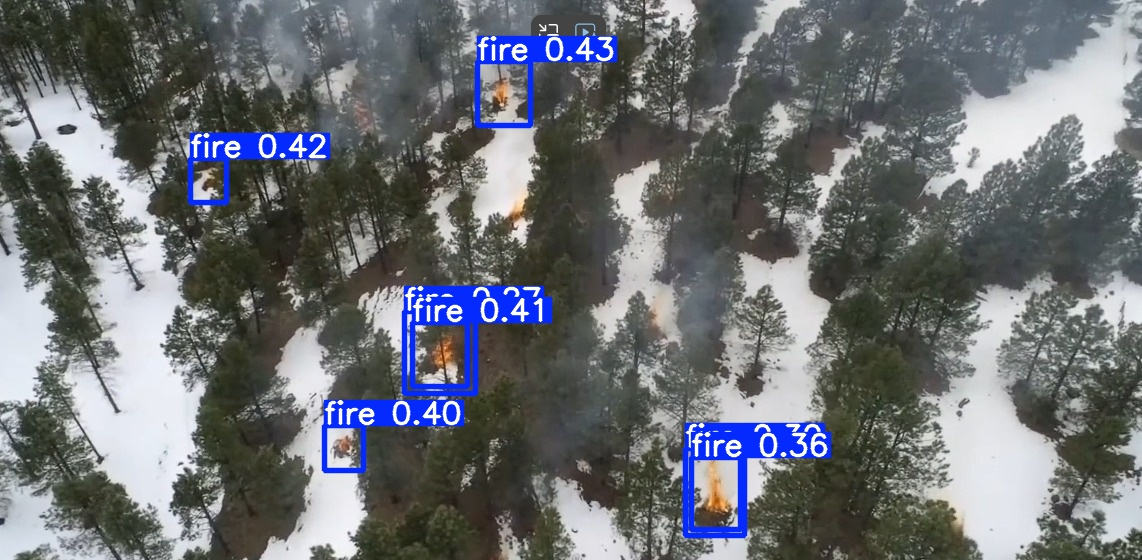

In [24]:
import glob
from IPython.display import Image, display

for img_path in glob.glob('/content/runs/detect/predict/*.jpg'):
    display(Image(filename=img_path))
